# HPLC Processing & Analysis

## Overview
**H**igh-**P**erformance **L**iquid **C**hromatography (HPLC) is an analytical technique which allows for the quantitative characterization of the components of a mixture. In the lab, we typically use this this to quantify the turnover of sugars and organic acids such as glucose and acetate. While many of the technical details of HPLC are now automated, the programmatic cleaning and processing of the resulting data can be cumbersome. The `cremerlab.hplc` module is written to allevieate some of this burden, making the actual running of the HPLC the most time consuming part of the analysis. The rest of this page will show you how to use the `cremerlab.hplc` module to convert the ASCII data output from our Shimadzu HPLC to a useable format and how to quantify the abundance of the relevant peaks.

## Setting Up Your HPLC Run


The `cremerlab.hplc` module has functions to read, convert, and analyze the data collected by the HPLC. The raw files, with the extension `.lcd` are not easily readable via Python. However, you can set up your experiment such that the necessary data (i.e. the file metadata and the raw chromatogram) are exported as ASCII text documents (with the extension `.txt`) delimited by commas (`,`). The image below shows how this can be set up in the "Quick Batch" setup. 

![](images/hplc_setup.png)

## ASCII File Conversion
Given a configuration like that shown above, the data will be saved in two formats. The first is a proprietary format (with the extension `.lcd`) but the other is an ASCII text document (with the extension `.txt`). The latter document, will have all of the metadata associated with the HPLC run as well as the underlying chromatogram for each detector. 

The ASCII document is formatted such that its (mostly) human readable, but difficult to read programmatically. Furthermore, the file is named in an unclear way, making it difficult to tell what data corresponds to what sample. Luckily, the `.txt` document will have all of the metadata we need to know to map the file to the sample ID we defined when setting up the HPLC run in the previous section. The first sixty or so lines of a representative `.txt` file is shown below:

```
1: [Header]
2: Application Name,LabSolutions
3: Version,5.97 SP1
4: Data File Name,
5: C:\Users\cremerlab\Desktop\griffin\2021-03-17_REL606_NCM3722_turnover\batch_3172021_004_009.lcd
6: Output Date,3/17/2021
7: Output Time,9:36:36 PM
8: 
9: [File Information]
10: Type,Data File
11: Generated,3/17/2021 8:51:17 PM
12: Generated by,System Administrator
13: Modified,3/17/2021 9:36:36 PM
14: Modified by,System Administrator
15:
16: [Sample Information]
17: Operator Name,System Administrator
18: Acquired,3/17/2021 8:51:35 PM
19: Sample Type,1:Standard
20: Level,4
21: Sample Name,2021-03-17_NCM3722_NC_sample004
22: Sample ID,004
...
55: Dilution Factor,1
56: Vial#,31
57: Injection Volume,20
```

We can see that information about the sample name, acquisition date, sample ID, and vial number is buried in the the metadata. Further down in the file, we have the actual data of the chromatogram, 

```
77: [LC Chromatogram(Detector B-Ch1)]
78: Interval(msec),500
79: # of Points,5401
80: Start Time(min),0.000
81: End Time(min),45.000
82: Intensity Units,mV
83: Intensity Multiplier,0.001
84: R.Time (min),Intensity
85: 0.00000,-5
86: 0.00833,-5
87: 0.01667,0
```

with some more metadata about the detector settings. While we could manually piece together the information for each file, the `cremerlab.hplc` module has this ability built in. We can import the `cremerlab.hplc` module and call the `convert` function on this file.

In [1]:
# Import the cremerlab module
import cremerlab.hplc

# Define the path to the file. 
file ='data/2021-03-17_008.txt'

# Perform the conversion, saving the converted file in `data/converted/`
cremerlab.hplc.convert(file)

Converted file(s) saved to `data/converted`


We get a message that the conversion was successful and was saved to a directory `data/converted`. The converted files are in a comma separated value (`.csv`) format and have been renamed given the `Sample Name` specified when you set up the HPLC run. The front portion of the converted file now looks like this: 


```
1: #
2: # 2021-03-17_NCM3722_NC_sample004
3: # ------------------------------
4: # Acquired: 3/17/2021 8:51:35 PM
5: # Converted: 03/30/2021 01:03:44 PM
6: # Vial: 31
7: # Injection Volume: 20 uL
8: # Sample ID: 004
9: #
10: # Detector B
11: # ---------------------
12: # Acquisition Interval: 500 ms
13: # Intensity Units: mV
14: # Intensity Multiplier: 0.001
15: #
time_min,intensity_mV,detector
0.0,-5,B
```

The first 15 lines contain the relevant metadata about the particular run, including the date and time of the acquisition as well as the date and time at which it was converted. Most importantly, the chromatogram 
is now in a tidy format with each row corresponding to single measurement of the detector intensity at a given time. 

<div class='alert alert-info'> By default, the converted files will be saved in a folder `converted` in the directory of the source files. This can be overridden by specifying an `ouput_path` as an argument to `cremerlab.hplc.convert`. </div>  

### Converting Multiple Files
In this example, we have shown the conversion of a single file. Rather than passing a single file path, we can provide a list of file paths, all of which will be converted as above. To get a list of the files, you can use the `glob` Python module to pass a pattern of files:

In [2]:
# Load the glob module for getting matching files in a directory. 
import glob 

# Specify the pattern of file names we wish to convert:
raw_files = glob.glob('data/2021-03-26_calibration/*.txt')

# Print the list of raw files in ascending order
sorted(raw_files)

['data/2021-03-26_calibration/2021-03-26_000.txt',
 'data/2021-03-26_calibration/2021-03-26_001.txt',
 'data/2021-03-26_calibration/2021-03-26_002.txt',
 'data/2021-03-26_calibration/2021-03-26_003.txt',
 'data/2021-03-26_calibration/2021-03-26_004.txt',
 'data/2021-03-26_calibration/2021-03-26_005.txt',
 'data/2021-03-26_calibration/2021-03-26_006.txt',
 'data/2021-03-26_calibration/2021-03-26_007.txt',
 'data/2021-03-26_calibration/2021-03-26_008.txt']

With a list of files in hand, converting them to `.csv` is as easy as providing this list as the file argument:

In [3]:
# Convert all of the files in the list at once
cremerlab.hplc.convert(raw_files)

Converting ASCII output.: 100%|██████████| 9/9 [00:00<00:00, 18.04it/s]Converted file(s) saved to `data/2021-03-26_calibration/converted`



This shows how the `cremerlab.hplc.convert` can quickly convert the obtuse output from the HPLC software to something that's easy to read programmatically. There are many other arguments you can pass to chnage the detector channel, save directory, file names, etc. The documentation for the function can be accessed as `cremerlab.hplc.convert?`.

In [4]:
cremerlab.hplc.convert?

Signature:
cremerlab.hplc.convert(
    file_path,
    detector='B',
    delimiter=',',
    output_dir=None,
    save_prefix=None,
    save_suffix=None,
    verbose=True,
)
Docstring:
Reads the ASCII output from a Shimadzu HPLC and returns a DataFrame of the
chromatogram. Converted files can also be saved to disk with human-readable 
metadata. 

Parameters
----------
file_path : str or list of str
    The file path of the ASCII file to read. Multiple files can be provided 
    as a list of file paths. 
detector : str or list of str, ['A' or 'B']
    The detector channel chromatogram to return. Must be either 'A' or 'B' 
    or both, if provided as a list. Default is just 'B'.
delimiter: str 
    The delimiter used in the file. If  tab-delimited, use `        `. Default is 
    a comma, `,`.
output_dir : str or None
    The output directory if the dataframe are to be saved to disk. If 
    `None` and `save = True`, the dataframe will be saved in the directory 
    of the `file` in an `ou

## Measuring Peaks
With the file converted, we can now try to quantify the chromatogram. Quantification of the peaks involves

1. Loading the chromatogram
2. Identifying the location of the peaks, both isolate dand overlapping.
3. Inferring the area under the peak and deconvolving overlapping peaks.

We can start with loading the chromatogram as a `cremerlab.hplc.Chromatogram` object. This is a glorified pandas DataFrame on which we can call several quantification and visualization methods. 

To load a chromatogram, we just have to provide the file path to the coverted ASCII file.

In [5]:
file = 'data/converted/2021-03-17_NCM3722_NC_sample004.csv'
chrom = cremerlab.hplc.Chromatogram(file)

The chromatogram is now loaded into memory, but typing `chrom` doesn't provide much information

In [6]:
chrom

The variable `chrom` is assigned to a `Chromatogram` object, which by itself is not useful. To explore the chromatogram, we can can call the `show()` method on the chromatogram, which will plot the intensity as a function of time

[<Figure size 576x432 with 1 Axes>,
 <AxesSubplot:xlabel='time_min', ylabel='intensity_mV'>]

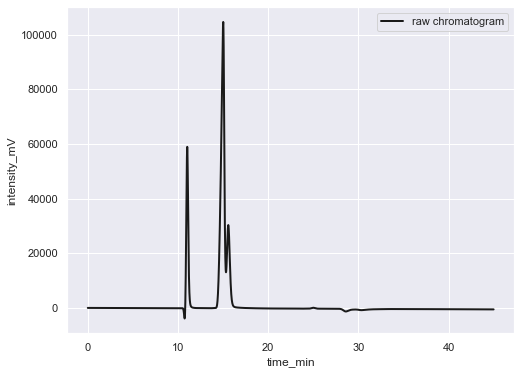

In [7]:
chrom.show()

There appear to be three strong peaks in the chromatogram, but they all occupy a relatively small portion of the actual trace. We can restrict the time range of the chromatogram by the `crop` method on `chrom`. This method takes a single argument of `time_window` which is a list with the lower and upper time bounds we want to consider. Looking at the above plot, we only care about the information between around 10 and 20 minutes.

[<Figure size 576x432 with 1 Axes>,
 <AxesSubplot:xlabel='time_min', ylabel='intensity_mV'>]

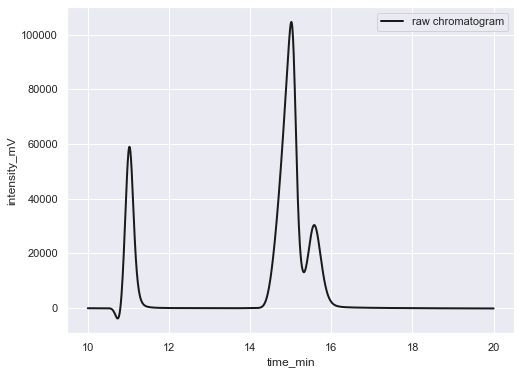

In [8]:
# Crop the chromatogram to consider only a narrow time range
chrom.crop([10, 20])

# Plot the chromatogram again to see the new restricted chromatogram
chrom.show()

Note that after calling the `crop` method, we called the same `show` method that we did earlier. This shows that the chromatogram data in the `chrom` variable how now changed after we called the cropping function.

The three peaks are now clear in the chromatogram, with the latter two overlapping. To properly quantify the area under each peak, we would rather model the overlapping distributions of these peaks rather than drawing a simple threshold at the minimum between them, which is the default integration method in the Shimadzu software. 

The `Chromatogram` object has a method `quantify`, which detects the peaks, breaks the signal down into peak windows, and infers the mixture function. Aside from fitting the peaks, this function also returns a pandas DataFrame with a list of the peaks, their areas, retention time, and various parameters which define the fitting distribution.


In [9]:
# Call the quantification function which returns a peak table.
peak_table = chrom.quantify()

Fitting peak windows...: 100%|██████████| 2/2 [00:00<00:00,  2.82it/s]


We can show the inferred peak distributions overlaid with the raw chromatogram again by calling the `show` method

[<Figure size 576x432 with 1 Axes>,
 <AxesSubplot:xlabel='time_min', ylabel='intensity_mV'>]

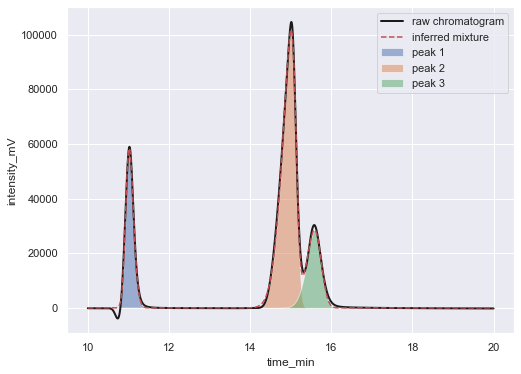

In [11]:
chrom.show()

Here, the raw chromatogram is shown in solid black, the individual peaks are shown in different colors (blue, orange, and green) and the inferred mixture distribution is shown as a dashed red line. **It's important to view this fit for each file you process to make sure that it passes the eye test.**

We can see the quantification by printing the peak table

In [12]:
# Show the quantified peaks
peak_table

amplitude          area  peak_idx  retention_time     scale      skew
0  14063.725318  1.687647e+06         1       10.951632  0.130843  1.477597
1  42681.449074  5.121774e+06         2       15.135354  0.287969 -3.569183
2  12786.511927  1.534381e+06         3       15.723841  0.251419 -1.644721

Note that the column `peak_idx` corresponds to the index of the peaks from left to right (with indexing beginning at 1). Note taht there are many options one can tweak to improve the peak quantification. See the documentation page for [cremerlab.hplc.Chromatogram](https://cremerlab.github.io/cremerlab-utils/)

## Batch Measurement
Like with file conversion, it is likely that you want to process a batch of chromatograms rather than going one-by-one with the steps above. The function `cremerlab.hplc.batch_process` can do exactly that, returning pandas DataFrames of all chromatograms, a single dataframe for the peaks, and present a visualization of all chromatograms with inferred peak distributions. Much like the `cremerlab.hplc.convert` function, we just have to provide a list of the converted files we want processed.

Processing files...: 100%|██████████| 9/9 [00:02<00:00,  4.04it/s]


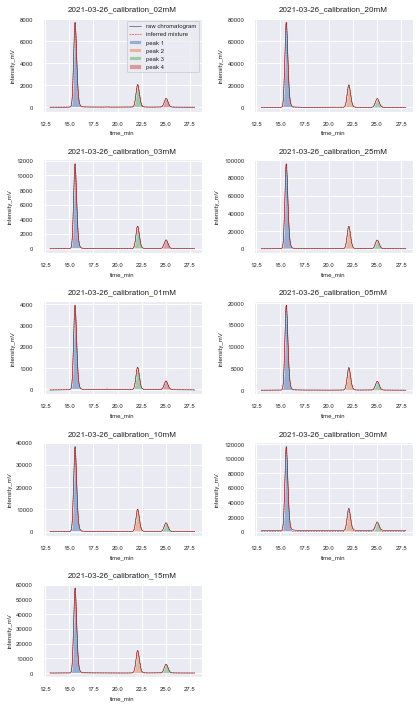

In [13]:
# Get the list of converted calibration samples
files = glob.glob('data/2021-03-26_calibration/converted/*.csv')
chromatograms, peaks, figure = cremerlab.hplc.batch_process(files, time_window=[13, 28], show_viz=True)

With the peak table `peaks` as the output

In [14]:
peaks.head()

amplitude          area  peak_idx  retention_time     scale      skew  \
0   3079.349501  3.695219e+05         1       15.492449  0.216872  1.490609   
1      4.514728  5.417674e+02         2       18.908573  0.121150  0.485002   
2    915.179738  1.098216e+05         3       21.964891  0.226339  1.163709   
3    378.749661  4.544996e+04         4       24.919263  0.228006  0.914766   
0  30560.748305  3.667290e+06         1       15.492126  0.215518  1.472511   

                        sample  
0  2021-03-26_calibration_02mM  
1  2021-03-26_calibration_02mM  
2  2021-03-26_calibration_02mM  
3  2021-03-26_calibration_02mM  
0  2021-03-26_calibration_20mM

Note that this is detecting small peaks present in the chromatogram that are not immediately detectable by eye. The peak table has a new column `sample` which relates the observed peaks ot the filename of the chromatogram in which they are present.